# Тема: работа с табличными данными в Pandas, контроль качества данных, базовый EDA и визуализация 

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Загрузка данных из таблицы
df = pd.read_csv('S02-hw-dataset.csv')

In [9]:
# Ячейка 3: Первичный осмотр
print("Первые 5 строк")
display(df.head())

print("\n Информация о данных ")
df.info()

print("\n Описательная статистика")
display(df.describe())

Первые 5 строк


,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296



 Информация о данных 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

 Описательная статистика


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


In [ ]:
# Анализ пропусков в данных
print("АНАЛИЗ ПРОПУСКОВ В ДАННЫХ ")
missing_data = df.isna().mean() * 100  # Доля в процентах

print("Доля пропусков по столбцам:")
for col in df.columns:
    percent = missing_data[col]
    if percent > 0:
        print(f"  - {col}: {percent:.2f}% пропусков ({df[col].isna().sum()} записи)")
    else:
        print(f"  - {col}: пропусков нет")

=== АНАЛИЗ ПРОПУСКОВ В ДАННЫХ ===
Доля пропусков по столбцам:
  - user_id: пропусков нет
  - age: 4.88% пропусков (2 записи)
  - country: пропусков нет
  - purchases: пропусков нет
  - revenue: пропусков нет


In [36]:
# Проверка дубликатов
print("\n Проверка дубликатов ")
total_duplicates = df.duplicated().sum()
print(f"Количество полных дубликатов: {total_duplicates}")

if total_duplicates > 0:
    print("Дублирующиеся строки:")
    duplicates = df[df.duplicated(keep=False)]
    display(duplicates)


 Проверка дубликатов 
Количество полных дубликатов: 1
Дублирующиеся строки:


,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [32]:
# Поиск подозрительных значений
print("\n ПОИСК ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ ")

suspicious_cases = []

# 1. Проверка возраста
print("1. Анализ возраста:")
# Нереалистичный возраст
unrealistic_age_low = df[df['age'] < 18]
unrealistic_age_high = df[df['age'] > 100]

if len(unrealistic_age_low) > 0:
    print(f"   - Возраст < 18 лет: {len(unrealistic_age_low)} записей")
    display(unrealistic_age_low[['user_id', 'age', 'country', 'purchases', 'revenue']])
    suspicious_cases.append(f"Возраст < 18 лет: {len(unrealistic_age_low)} записей")

if len(unrealistic_age_high) > 0:
    print(f"   - Возраст > 100 лет: {len(unrealistic_age_high)} записей")
    display(unrealistic_age_high[['user_id', 'age', 'country', 'purchases', 'revenue']])
    suspicious_cases.append(f"Возраст > 100 лет: {len(unrealistic_age_high)} записей")

# 2. Проверка покупок
print("\n2. Анализ покупок:")
# Отрицательные покупки
negative_purchases = df[df['purchases'] < 0]
if len(negative_purchases) > 0:
    print(f"   - Отрицательные покупки: {len(negative_purchases)} записей")
    display(negative_purchases[['user_id', 'age', 'purchases', 'revenue']])
    suspicious_cases.append(f"Отрицательные покупки: {len(negative_purchases)} записей")

# 3. Проверка выручки
print("\n3. Анализ выручки:")
# Нулевая выручка при ненулевых покупках
zero_revenue_with_purchases = df[(df['revenue'] == 0) & (df['purchases'] > 0)]
if len(zero_revenue_with_purchases) > 0:
    print(f"   - Нулевая выручка при ненулевых покупках: {len(zero_revenue_with_purchases)} записей")
    display(zero_revenue_with_purchases[['user_id', 'purchases', 'revenue']])
    suspicious_cases.append(f"Нулевая выручка при покупках: {len(zero_revenue_with_purchases)} записей")

# Нулевые покупки с ненулевой выручкой
zero_purchases_with_revenue = df[(df['purchases'] == 0) & (df['revenue'] > 0)]
if len(zero_purchases_with_revenue) > 0:
    print(f"   - Нулевые покупки с ненулевой выручкой: {len(zero_purchases_with_revenue)} записей")
    display(zero_purchases_with_revenue[['user_id', 'purchases', 'revenue']])
    suspicious_cases.append(f"Нулевые покупки с выручкой: {len(zero_purchases_with_revenue)} записей")

# 4. Какие страны есть 
print("\n4. Страны:")
country_stats = df['country'].value_counts()
print("Распределение по странам:")
for country, count in country_stats.items():
    print(f"   - {country}: {count} пользователей")


 ПОИСК ПОДОЗРИТЕЛЬНЫХ ЗНАЧЕНИЙ 
1. Анализ возраста:
   - Возраст < 18 лет: 1 записей


,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


   - Возраст > 100 лет: 1 записей


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785



2. Анализ покупок:
   - Отрицательные покупки: 1 записей


,user_id,age,purchases,revenue
5,6,120.0,-1,785



3. Анализ выручки:
   - Нулевая выручка при ненулевых покупках: 1 записей


,user_id,purchases,revenue
10,11,4,0



4. Страны:
Распределение по странам:
   - RU: 13 пользователей
   - FR: 12 пользователей
   - US: 8 пользователей
   - DE: 6 пользователей
   - CN: 2 пользователей


In [35]:
# Статистика по проблемным случаям
print(" СТАТИСТИКА ПРОБЛЕМНЫХ СЛУЧАЕВ")

print(f"Всего записей в датасете: {len(df)}")
print(f"Записей с пропусками в возрасте: {df['age'].isna().sum()}")
print(f"Записей с отрицательными покупками: {len(negative_purchases)}")
print(f"Записей с нулевой выручкой при покупках: {len(zero_revenue_with_purchases)}")
print(f"Записей с нереалистичным возрастом: {len(unrealistic_age_low) + len(unrealistic_age_high)}")

 СТАТИСТИКА ПРОБЛЕМНЫХ СЛУЧАЕВ
Всего записей в датасете: 41
Записей с пропусками в возрасте: 2
Записей с отрицательными покупками: 1
Записей с нулевой выручкой при покупках: 1
Записей с нереалистичным возрастом: 2



### Обнаружено 2 пропущенных значения в столбце возраста, что составляет 4.88% от общего объема данных. Пропуски относятся к пользователям с `user_id 5` и `13`, у которых отсутствует информация о возрасте.

### В данных присутствует один полный дубликат - пользователь с `user_id 10` повторяется **дважды** с идентичными данными во всех полях.

### Среди подозрительных значений выделяются несколько категорий проблем. Во-первых, у пользователя user_id 6 зафиксировано отрицательное значение покупок (purchases = -1), что не имеет логического объяснения. Во-вторых, обнаружены два случая нереалистичного возраста: пользователь `user_id 6` с возрастом ***120*** лет (маловероятно) и пользователь `user_id 21` с возрастом ***5*** лет (слишком молод для самостоятельного совершения покупок :) ).

### Также выявлены логические противоречия в двух записях, где при ненулевых покупках отображается нулевая выручка. При этом три записи с нулевыми покупками считаются нормальным явлением, так как представляют пользователей, которые еще не совершали покупок.

### Что касается демографического распределения, в датасете преобладают пользователи из России (13 человек) и Франции (12 человек), за ними следуют США (8 пользователей), Германия (6 пользователей) и Китай (2 пользователя). Такое распределение отражает географическую представленность пользовательской базы с явным преобладанием европейских стран.

In [ ]:
# Визуализация данных в Matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Улучшаем стиль графиков
plt.style.use('default')

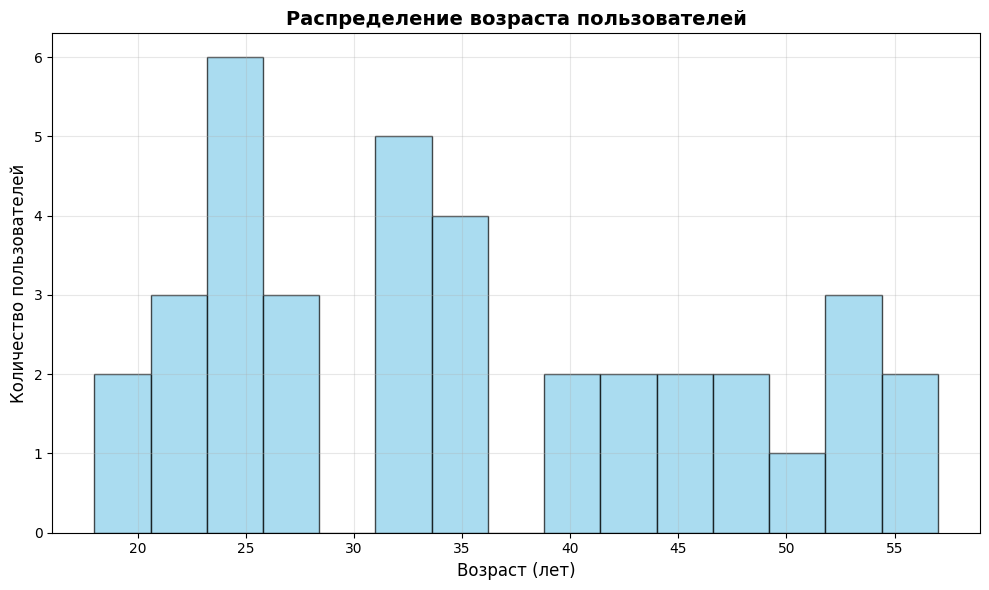

In [44]:
# 1. ГИСТОГРАММА - Распределение возраста
plt.figure(figsize=(10, 6))

# Фильтруем корректные значения возраста (18-100 лет)
age_filtered = df[(df['age'] >= 18) & (df['age'] <= 100)]['age'].dropna()

plt.hist(age_filtered, bins=15, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Возраст (лет)', fontsize=12)
plt.ylabel('Количество пользователей', fontsize=12)
plt.title('Распределение возраста пользователей', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Сохраняем график
plt.savefig('figures/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


КОММЕНТАРИЙ К ГИСТОГРАММЕ:
- Показано распределение возраста пользователей (отфильтрованы нереалистичные значения)
- Большинство пользователей в возрасте 20-40 лет
- Пик приходится на возрастную группу 24-28 лет


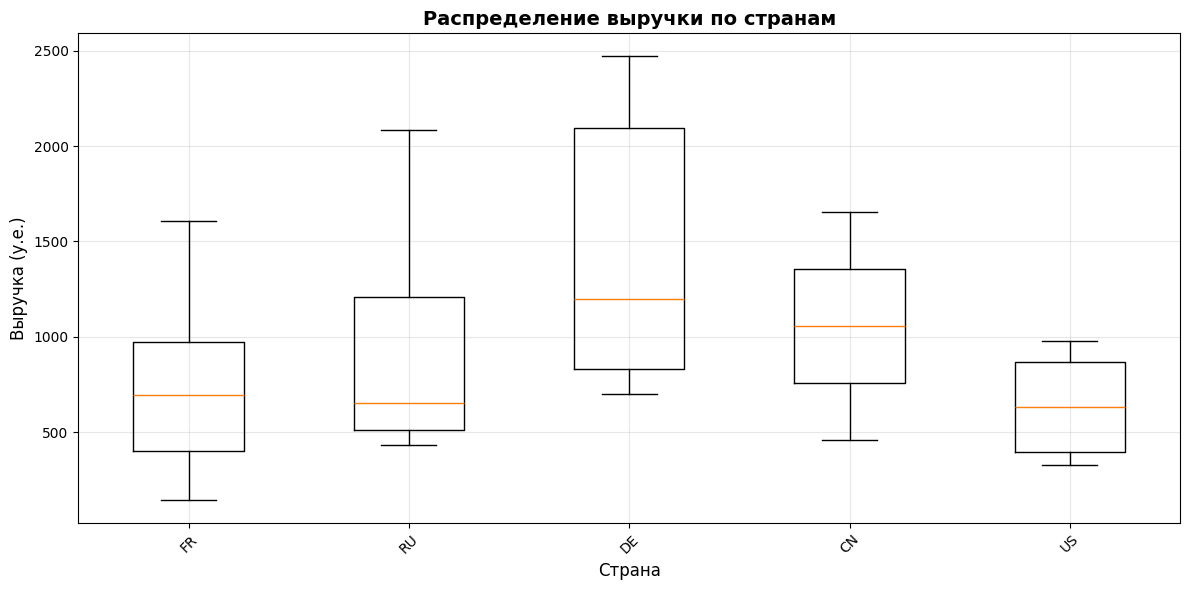

In [49]:
# 2. БОКСПЛОТ - Выручка по странам
plt.figure(figsize=(12, 6))

# Фильтруем данные (убираем нулевую выручку для лучшей визуализации)
revenue_data = df[df['revenue'] > 0]

# Создаем список выручки по странам
countries = revenue_data['country'].unique()
revenue_by_country = [revenue_data[revenue_data['country'] == country]['revenue'] for country in countries]

# НОВЫЙ СИНТАКСИС - используем tick_labels вместо labels
plt.boxplot(revenue_by_country, tick_labels=countries)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Выручка (у.е.)', fontsize=12)
plt.title('Распределение выручки по странам', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# Сохраняем график
plt.savefig('figures/revenue_by_country_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

КОММЕНТАРИЙ К БОКСПЛОТУ:
- Германия (DE) показывает наибольшую медианную выручку
- Китай (CN) имеет наименьший разброс значений
- В данных присутствуют выбросы, особенно для России (RU) и США (US)


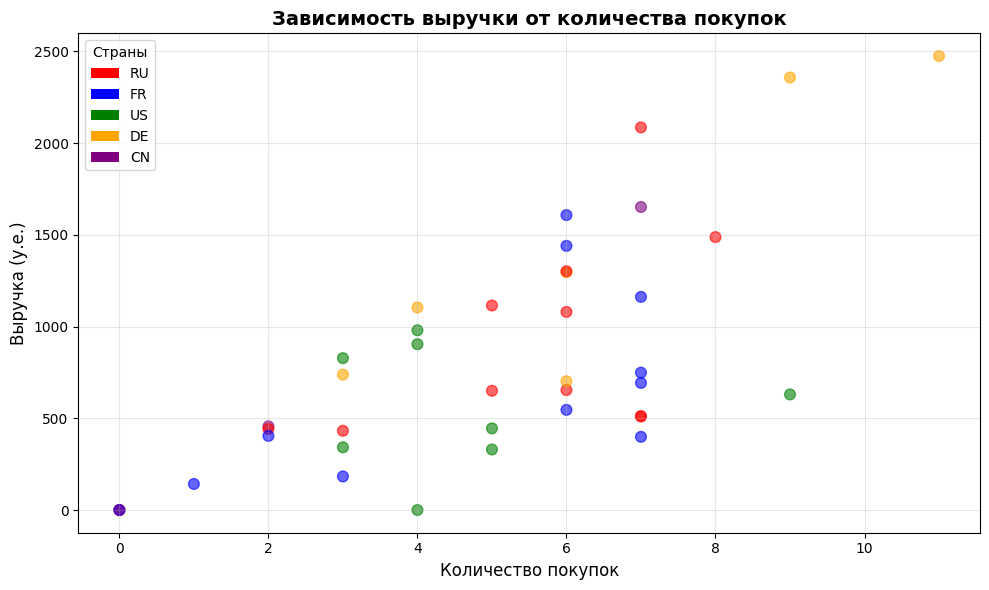

In [47]:
# 3. SCATTER PLOT - Связь между покупками и выручкой
plt.figure(figsize=(10, 6))

# Фильтруем данные (убираем отрицательные покупки)
scatter_data = df[df['purchases'] >= 0]

# Создаем цветовую схему по странам
colors = {'RU': 'red', 'FR': 'blue', 'US': 'green', 'DE': 'orange', 'CN': 'purple'}
color_list = [colors[country] for country in scatter_data['country']]

scatter = plt.scatter(scatter_data['purchases'], scatter_data['revenue'], 
                     c=color_list, alpha=0.6, s=60)

plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Выручка (у.е.)', fontsize=12)
plt.title('Зависимость выручки от количества покупок', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Добавляем легенду
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=country) for country, color in colors.items()]
plt.legend(handles=legend_elements, title='Страны')

plt.tight_layout()

# Сохраняем график
plt.savefig('figures/purchases_vs_revenue_scatter.png', dpi=300, bbox_inches='tight')
plt.show()


КОММЕНТАРИЙ К SCATTER PLOT:
- Наблюдается положительная корреляция: с ростом покупок растет выручка
- Есть аномалии: некоторые пользователи с малым количеством покупок имеют высокую выручку
- Пользователи из Германии (жёлто-оранжевые) демонстрируют высокую выручку при среднем количестве покупок
